In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as distance
from typing import Tuple
from tqdm import tqdm

In [29]:
def slide_window(image: np.ndarray, window_width: int, window_height: int, pixels_step: int) -> dict:
    
    h, w = image.shape
    histograms = dict()
    
    for x in range(0, h, pixels_step):
        for y in range(0, w, pixels_step):
            window = image[x:(x+window_width), y:(y+window_height)]
            hist = cv2.calcHist([window], [0], None, [128], [0,256])                        
            histograms[(x, y)] = hist
            
    return histograms

In [30]:
def nearest_histograms(histograms: dict) -> Tuple[Tuple[int, int], Tuple[int, int]]:
    min_euclidean_distance = np.inf
    min_manhattan_distance = np.inf
    for point_x, hist_x in tqdm(histograms.items()):
        for point_y, hist_y in histograms.items():
            if point_x != point_y:
                
                euclidean_distance = distance.euclidean(hist_x, hist_y)
                manhattan_distance = distance.cityblock(hist_x, hist_y)
                
                if euclidean_distance < min_euclidean_distance:
                    min_euclidean_distance = euclidean_distance
                    min_euclidean_distance_points = point_x, point_y
                    
                if manhattan_distance < min_manhattan_distance:
                    min_manhattan_distance = manhattan_distance
                    manhattan_distance_points = point_x, point_y
                    
    return min_euclidean_distance_points, manhattan_distance_points      

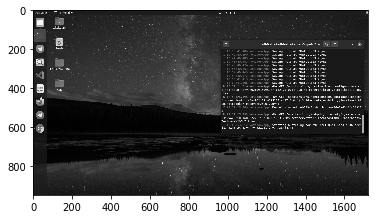

In [31]:
image = cv2.imread("Screenshot.png", cv2.IMREAD_GRAYSCALE)
screen = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.imshow(screen);

In [37]:
histograms = slide_window(image, 100, 100, 50)
# возьмем шаг 50 (10 долго считает)
min_euclidean_distance_points, manhattan_distance_points  = nearest_histograms(histograms)

100%|██████████| 665/665 [00:20<00:00, 32.52it/s]


In [48]:
print("Points with minimal euclidean distance", min_euclidean_distance_points) 
print("Points with minimal manhattan distance", manhattan_distance_points)

Points with minimal euclidean distance ((200, 1550), (200, 1600))
Points with minimal manhattan distance ((200, 1550), (200, 1600))


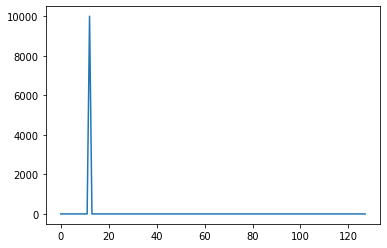

In [44]:
plt.plot(histograms[manhattan_distance_points[0]])

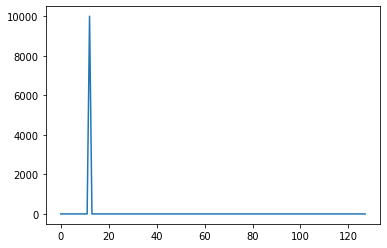

In [45]:
plt.plot(histograms[manhattan_distance_points[1]])

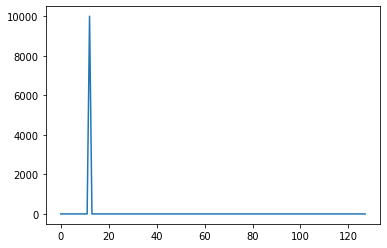

In [49]:
plt.plot(histograms[min_euclidean_distance_points[1]])